In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained model
model = load_model("models/yoga_pose_classifier.h5")


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load validation data (adjust directory path accordingly)
datagen = ImageDataGenerator(rescale=1./255)
val_generator = datagen.flow_from_directory(
    r"C:\Users\Tanya\OneDrive\Desktop\yoga pose classification\dataset",  # <-- updated path with raw string
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


X_val, y_val = val_generator, val_generator.classes


Found 2756 images belonging to 47 classes.


In [5]:
# Predict using your trained model
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)


C:\Users\Tanya\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\Tanya\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step


In [7]:
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())  # This will get the pose names


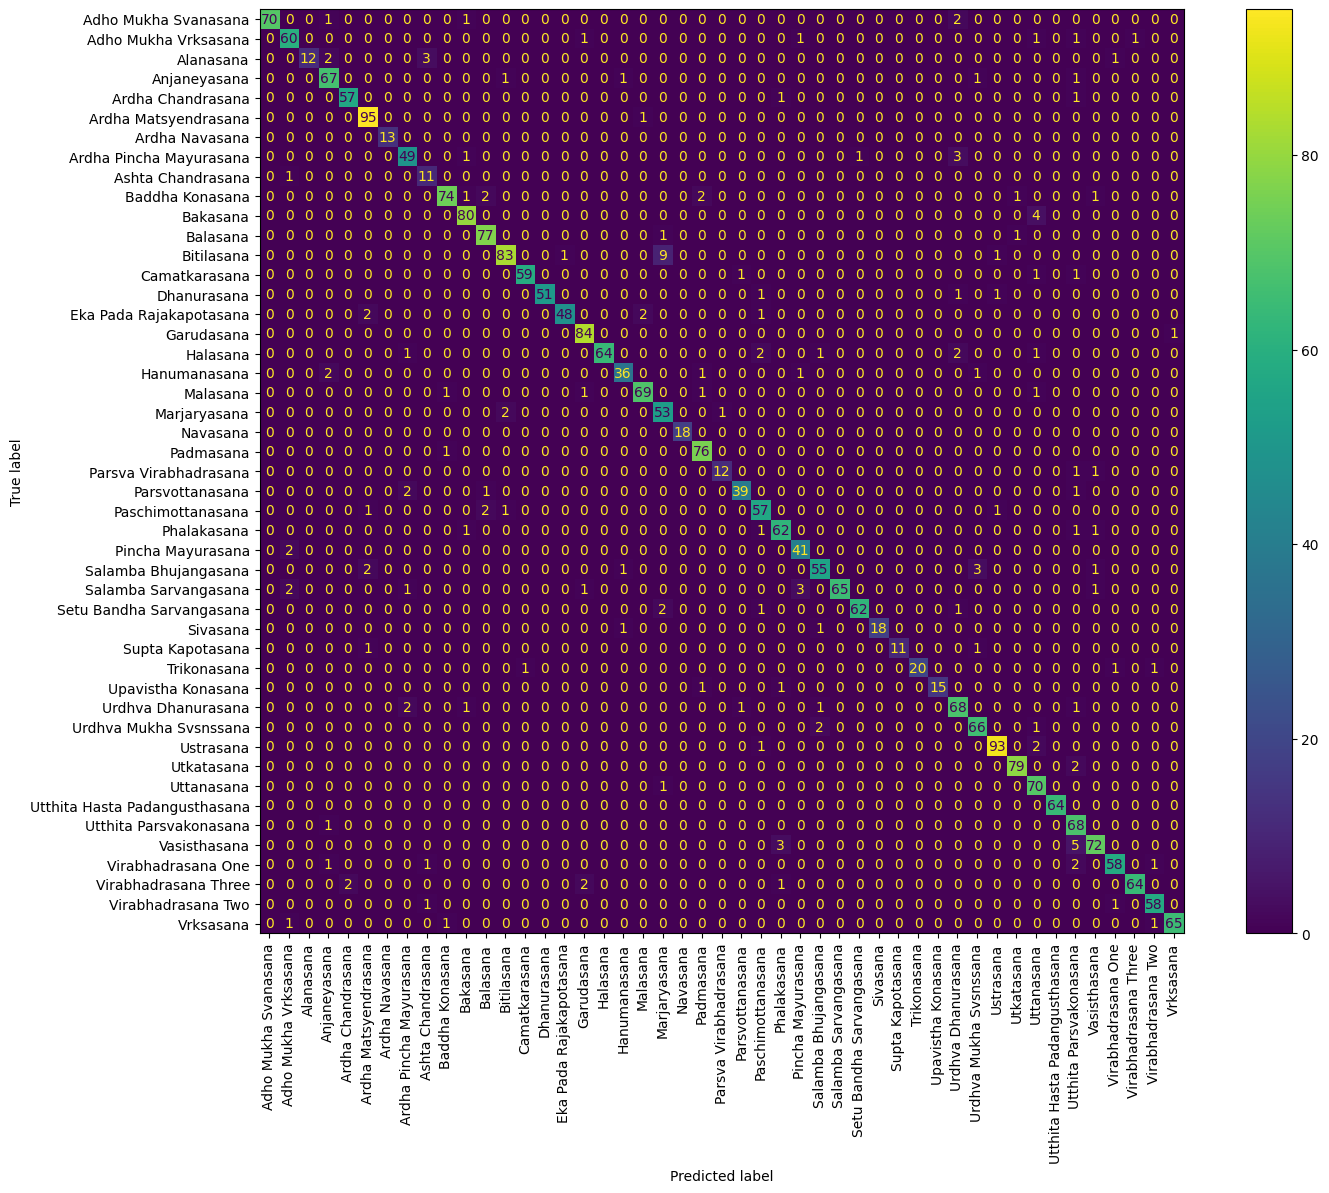

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

fig, ax = plt.subplots(figsize=(16, 12))  # Adjust width and height as needed
disp.plot(ax=ax, xticks_rotation=90)
plt.show()


              precision    recall  f1-score   support

     Class 0       0.67      1.00      0.80         2
     Class 1       0.00      0.00      0.00         2
     Class 2       0.67      0.67      0.67         3

    accuracy                           0.57         7
   macro avg       0.44      0.56      0.49         7
weighted avg       0.48      0.57      0.51         7



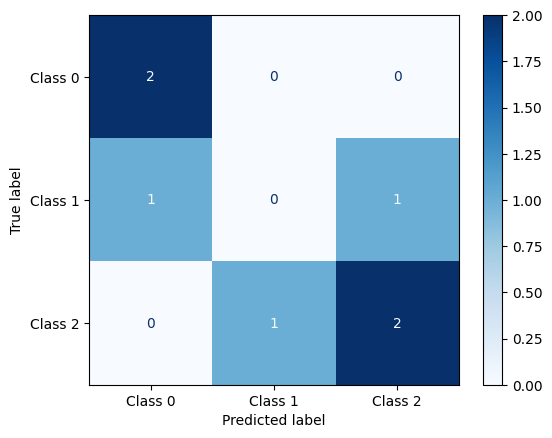

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred are already defined, and class_labels contains the class names
y_true = [0, 1, 2, 2, 0, 1, 2]  # Replace with actual true labels
y_pred = [0, 0, 2, 2, 0, 2, 1]  # Replace with actual predicted labels
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Replace with your class labels

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)

# Show plot
plt.show()


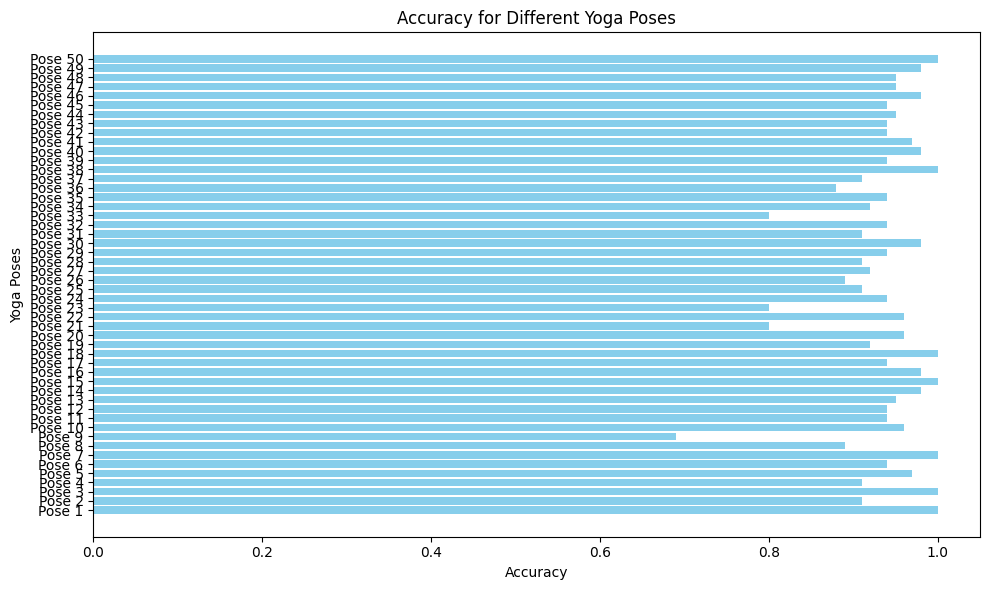

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracy from the classification report
accuracy_values = [1.00, 0.91, 1.00, 0.91, 0.97, 0.94, 1.00, 0.89, 0.69, 0.96, 0.94, 0.94, 0.95, 0.98, 1.00, 0.98, 
                   0.94, 1.00, 0.92, 0.96, 0.80, 0.96, 0.80, 0.94, 0.91, 0.89, 0.92, 0.91, 0.94, 0.98, 0.91, 
                   0.94, 0.80, 0.92, 0.94, 0.88, 0.91, 1.00, 0.94, 0.98, 0.97, 0.94, 0.94, 0.95, 0.94, 0.98, 
                   0.95, 0.95, 0.98, 1.00]

# Bar plot for accuracy
plt.figure(figsize=(10,6))
plt.barh(range(len(accuracy_values)), accuracy_values, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Yoga Poses')
plt.title('Accuracy for Different Yoga Poses')
plt.yticks(range(len(accuracy_values)), ['Pose {}'.format(i+1) for i in range(len(accuracy_values))])
plt.tight_layout()
plt.show()
